# IIBM Bootcamp 2025: Day 5 Afternoon
### Instructors Carlos Valle (cgvalle@uc.cl) and Nicolás Garrido (nagarrido@uc.cl)



This jupyter notebook will cover linear equations and basics solvers in Python

Content of the day:
* Fourier
* Filtering in the frequency space


# The Fourier Transorm

The Fourier Transform is probably one of the most important mathematical operations of all time. In a few words, **it decomposes signals into a set of frequencyes that compose the original signal**.

The logic is that any signal can be written as an infinitue sum of sines and cosines of varying amplitude and phase. The Fourier transform is a process though which you can find such values for each frequency in this infinite sum.

![](https://raw.githubusercontent.com/cgvalle/IIBM-BootCamp-2024/main/assets/D5/fourier_integral.png)

There is a whole course at the UC dedicated to understing the mathematics behind this mathematical transform, so we will only focus on why is so usefull.

We can obtain the cos and sin from :

<center>
$e^{ix} = cos(x) + i sin(x)$
</center>
    
    
### Practical exercise

Let's go with a practical example and open [Online spectrogram](https://spectrogram.sciencemusic.org/). A spectrogram is just doing the fourier transform multiple times and appending the results on time.
![](https://raw.githubusercontent.com/cgvalle/IIBM-BootCamp-2024/main/assets/D5/spectrogram.png)


* Whistle and watch the evolution of the frequencyes.
* In pairs Whistle at the same time
* Try playing a song.
* Can we remove some frequencyes if we wanted ?


# Fourier Inversion theorem
![](https://raw.githubusercontent.com/cgvalle/IIBM-BootCamp-2024/main/assets/D5/domain.png)

We can go from the time tomain to the frequency domain an vice-versa!!!.

Let's try to implement it on Python. We will create a signal with a sampling rate of 2000 Hz, a duration of 10 seconds with a two hz signal

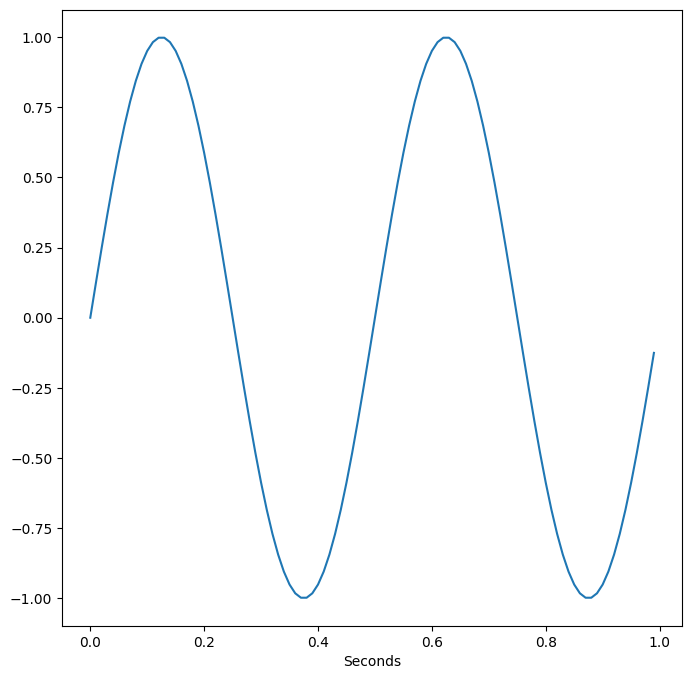

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq

    y = np.sin((2 * np.pi) * frequencies)
    return x, y

sample_rate = 100
duration = 1
x, y1 = generate_sine_wave(2, sample_rate, duration)
x, y2 = generate_sine_wave(8, sample_rate, duration)


y = y1
fig  = plt.figure(figsize=(8,8))
plt.plot(x, y)
plt.xlabel('Seconds')
plt.show()

[](https://raw.githubusercontent.com/CarlosValleA/IIBM-BootCamp-2023/main/assets/D5/domain.png)

### Getting the Fourier transform

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


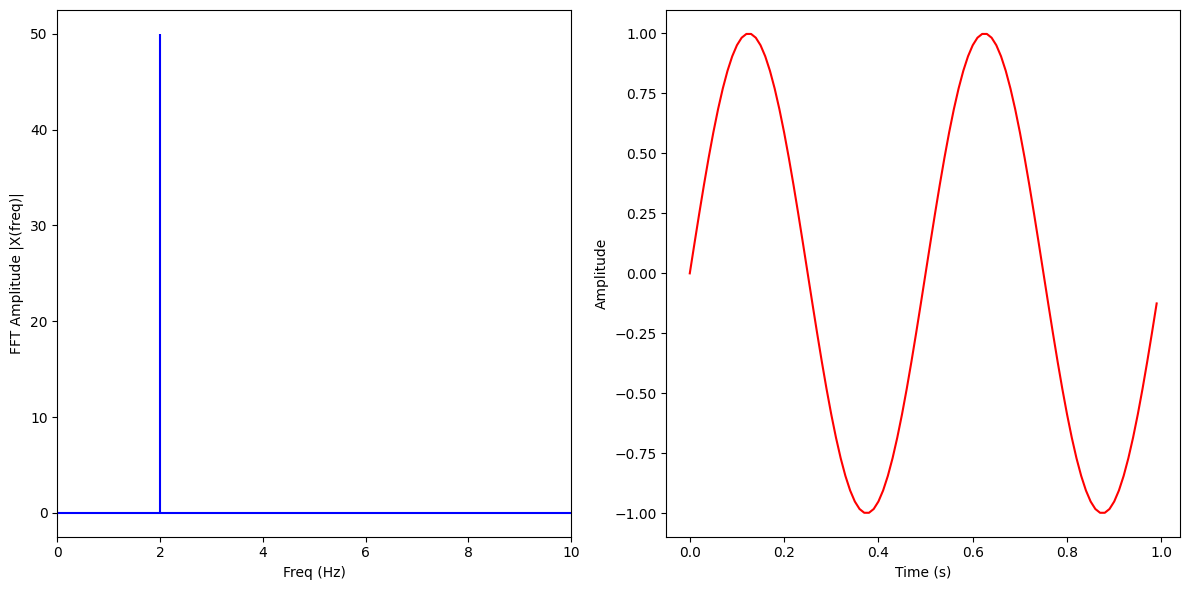

In [2]:
from numpy.fft import fft, ifft

X = fft(y)
N = len(X)
n = np.arange(N)
T = N/sample_rate
freq = n/T

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(freq, np.abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(x, ifft(X), 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

# Working with images

With can also observe at the frequency space with images. Since images have two dimensions, the frequency space will also have two dimensions. Instead of `fft` and `ifft` functions, we will use `fft2` and `ifft2` that can operate on images.

In [3]:
!curl -O https://raw.githubusercontent.com/CarlosValleA/IIBM-BootCamp-2023/main/assets/D5/lena.png

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  175k  100  175k    0     0   844k      0 --:--:-- --:--:-- --:--:--  845k


<ipython-input-4-6c0b23fbc72b>:7: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(lena)


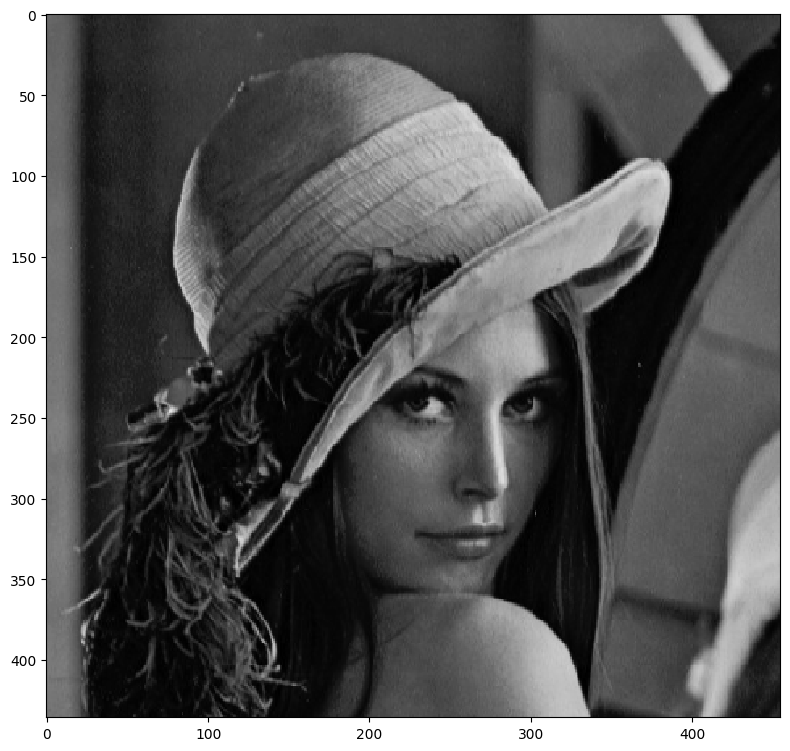

Image as a shape of  (436, 455)


In [4]:
# New libraries !
from skimage.io import imread, imshow
from matplotlib import pyplot as plt

lena = imread('lena.png')[:, :, 0]  # Only get one color channel
fig = plt.figure(figsize=(8,8))
imshow(lena)
plt.show()

# Shape
print("Image as a shape of ", lena.shape)


Now let's compute the image in the frequency space.

`fft2` $\rightarrow$ Fourier Transform 2D

`fftshift` $\rightarrow$ Shift the zero-frequency component to the center of the spectrum.



<ipython-input-5-3d14b70fa890>:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(np.log(np.abs(X)), cmap='gray')
/usr/local/lib/python3.11/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


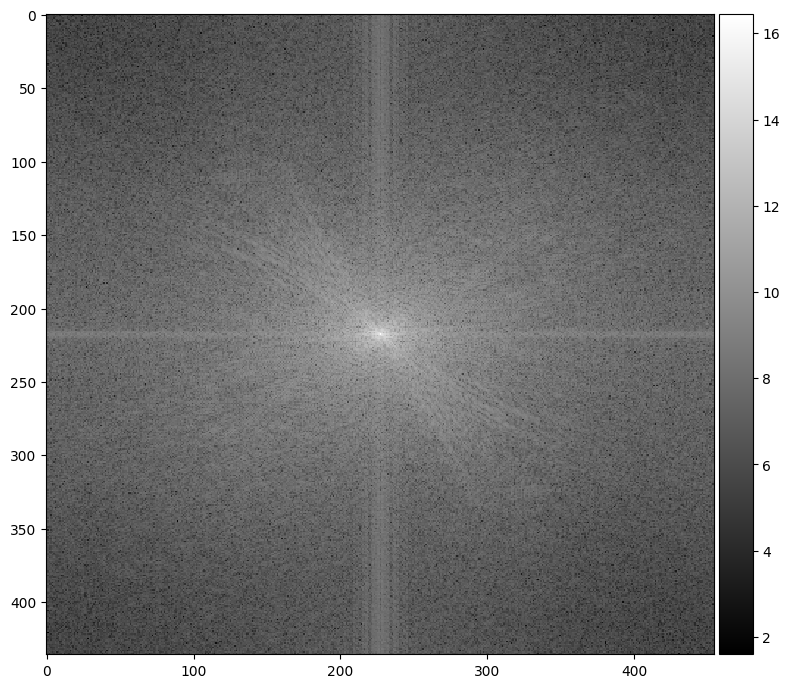

In [5]:
X = np.fft.fftshift(np.fft.fft2(lena))
fig = plt.figure(figsize=(8,8))
imshow(np.log(np.abs(X)), cmap='gray')
plt.show()

Reconstructed lena image from `X`. Low frequencies are located at the center of the image while high ones at the outside of the image.

<ipython-input-6-22b1fff7931d>:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(reconstructed, cmap='gray')
/usr/local/lib/python3.11/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


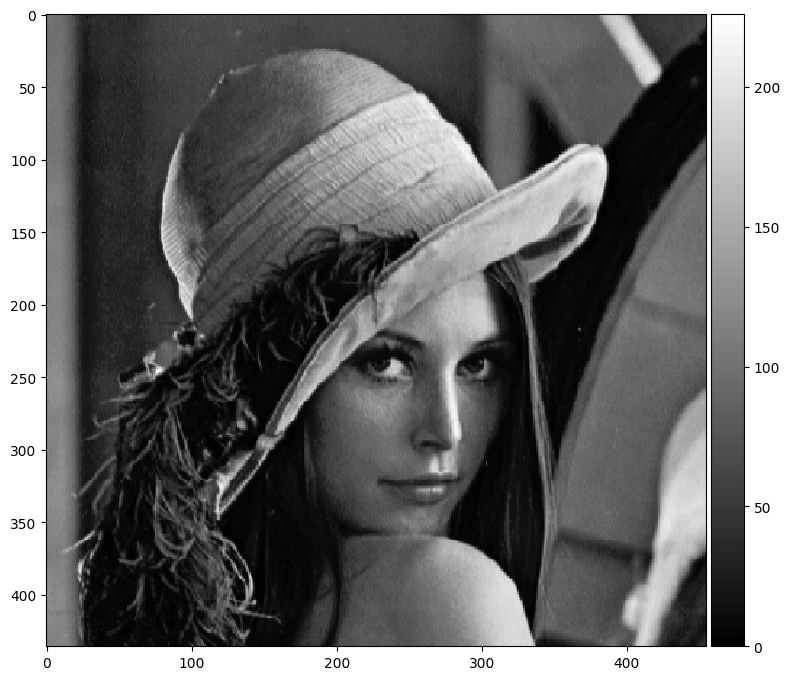

In [6]:
reconstructed = np.abs(np.fft.ifft2(np.fft.fftshift(X)))
fig = plt.figure(figsize=(8,8))
imshow(reconstructed, cmap='gray')
plt.show()


## The Fourier Inversion theorem is True !
We can modify the image in the frequency space to get interesting results. Let's apply a mask!:

<ipython-input-23-6ce18c7522dc>:15: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(np.log(np.abs(X)), cmap='gray')
/usr/local/lib/python3.11/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
<ipython-input-23-6ce18c7522dc>:18: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(mask>0.5, cmap='gray')
<ipython-input-23-6ce18c7522dc>:21: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(mask*np.log(np.abs(X)), cmap='gray')
/usr/local/lib/python3.11/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: Use

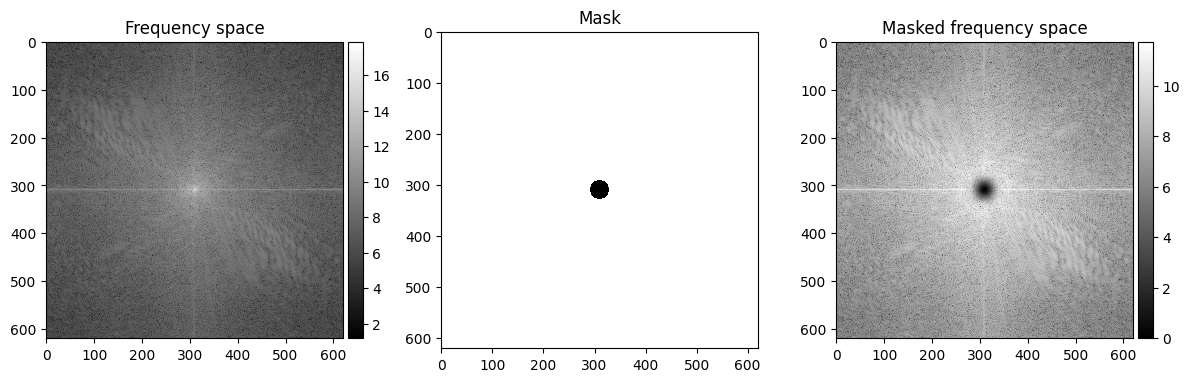

In [23]:
def gaus_mask(size, sigma_x, sigma_y, x, y):
    x = np.linspace(-10 - x, 10 - x, size[1])
    y = np.linspace(-10 + y, 10 + y, size[0])

    x, y = np.meshgrid(x, y)
    z = (1/(2*np.pi*sigma_x*sigma_y) * np.exp(-(x**2/(2*sigma_x**2)
         + y**2/(2*sigma_y**2))))
    return (z - np.min(z))/(np.max(z) - np.min(z))


mask = 1 - gaus_mask(lena.shape, sigma_x=0.5, sigma_y=0.5, x=0 ,y=0 )

fig = plt.figure(figsize=(12,10))
ax=plt.subplot(1,3,1)
imshow(np.log(np.abs(X)), cmap='gray')
ax.title.set_text("Frequency space")
ax=plt.subplot(1,3,2)
imshow(mask>0.5, cmap='gray')
ax.title.set_text("Mask")
ax=plt.subplot(1,3,3)
imshow(mask*np.log(np.abs(X)), cmap='gray')
ax.title.set_text("Masked frequency space")
plt.show()

Reconstructing the filtered image

<ipython-input-8-0a196a6c7a0e>:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(reconstructed, cmap='gray')
/usr/local/lib/python3.11/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


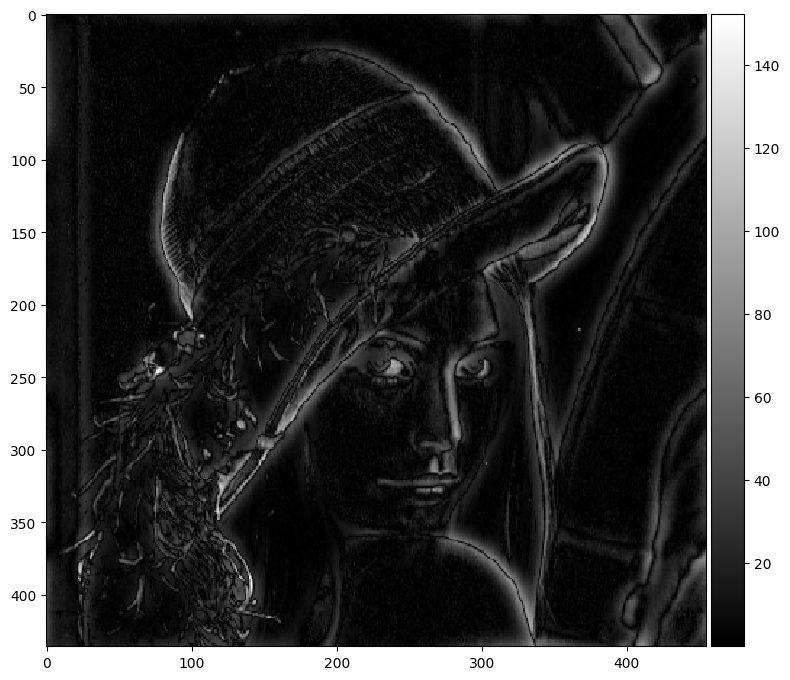

In [8]:
reconstructed = np.abs(np.fft.ifft2(np.fft.fftshift(X*mask)))
fig = plt.figure(figsize=(8,8))
imshow(reconstructed, cmap='gray')
plt.show()

We can do the same with a sobel convolution filter. so what ? . Fourier can delete more dificult noise!

<ipython-input-9-49c762c15394>:9: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(lena_grid, cmap='gray')
/usr/local/lib/python3.11/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


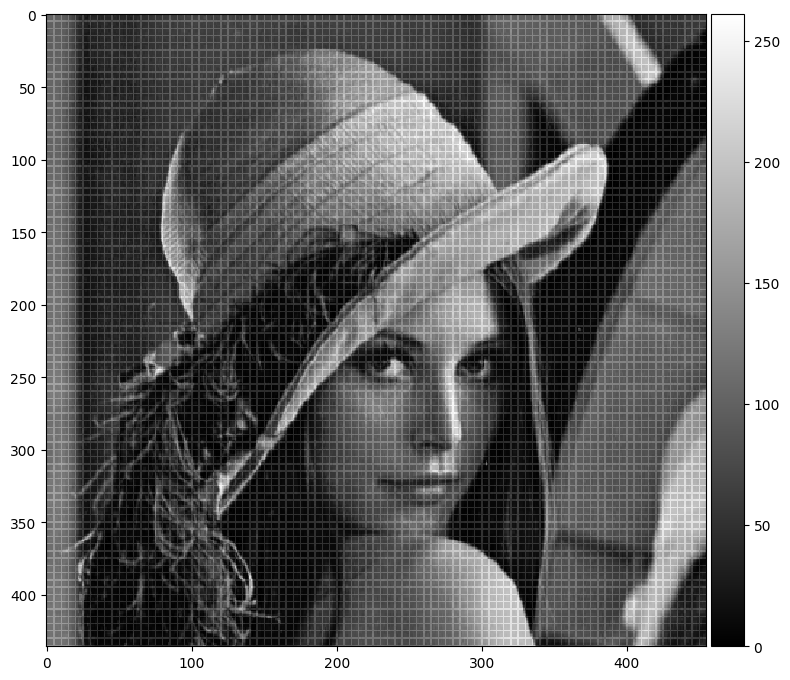

In [9]:
grid = np.zeros(lena.shape)

grid[:, ::5] = 40
grid[::5, :] = 40

lena_grid = grid + lena.copy()

fig = plt.figure(figsize=(8,8))
imshow(lena_grid, cmap='gray')
plt.show()

Comparing the original frequency space vs the lena with a grid

<ipython-input-10-eca7474f9a5c>:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(np.log(np.abs(X)), cmap='gray')
/usr/local/lib/python3.11/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
<ipython-input-10-eca7474f9a5c>:8: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(np.log(np.abs(X_grid)), cmap='gray')
/usr/local/lib/python3.11/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


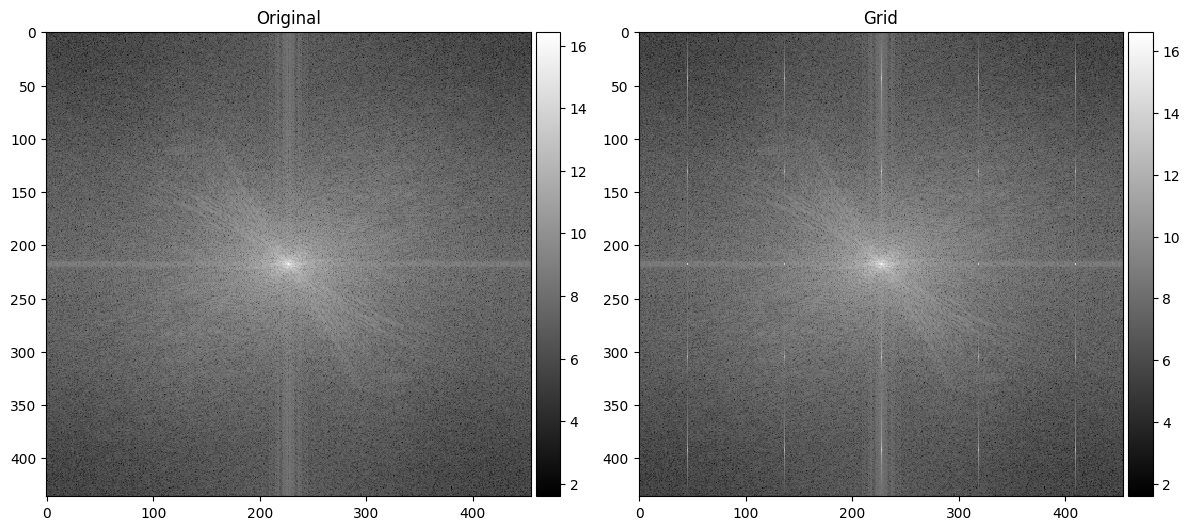

In [10]:
X_grid = np.fft.fftshift(np.fft.fft2(lena_grid))

fig = plt.figure(figsize=(12,10))
ax=plt.subplot(1,2,1)
imshow(np.log(np.abs(X)), cmap='gray')
ax.title.set_text("Original")
ax=plt.subplot(1,2,2)
imshow(np.log(np.abs(X_grid)), cmap='gray')
ax.title.set_text("Grid")
plt.show()

Let's try to remove the high frequency noises

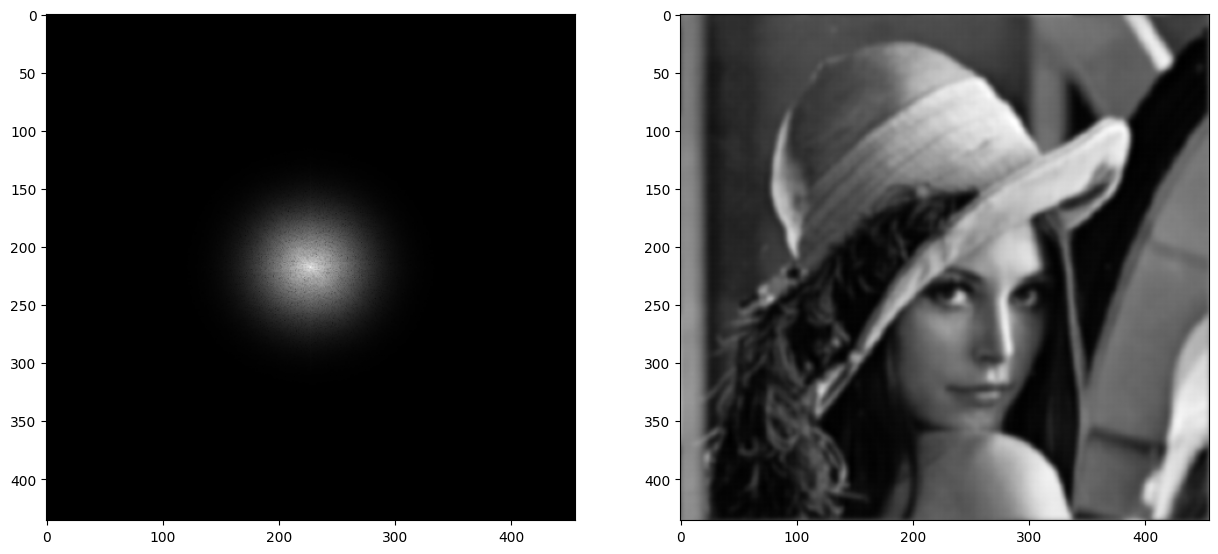

In [11]:
mask = gaus_mask(lena.shape, sigma_x=1.5, sigma_y=1.5, x=0 ,y=0 )


reconstructed = np.abs(np.fft.ifft2(np.fft.fftshift(X_grid*mask)))

fig = plt.figure(figsize=(15, 15))
plt.subplot(1,2,1)
plt.imshow(np.log(np.abs(X_grid))*mask, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(reconstructed, cmap='gray')
plt.show()


# Exercise 1.1
Download the image that is on the frequency domain and transform it to the space domain. **HINT: use the inverse Fourier transform**.

Create a plot with the image in the frequency domain and in the space domain

In [12]:
!curl -O https://raw.githubusercontent.com/cgvalle/IIBM-BootCamp-2025/main/assets/D5/X.npy

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6006k  100 6006k    0     0  20.4M      0 --:--:-- --:--:-- --:--:-- 20.3M


<ipython-input-21-13db0b0e6eb3>:9: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(np.log(np.abs(X)), cmap='gray')
/usr/local/lib/python3.11/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


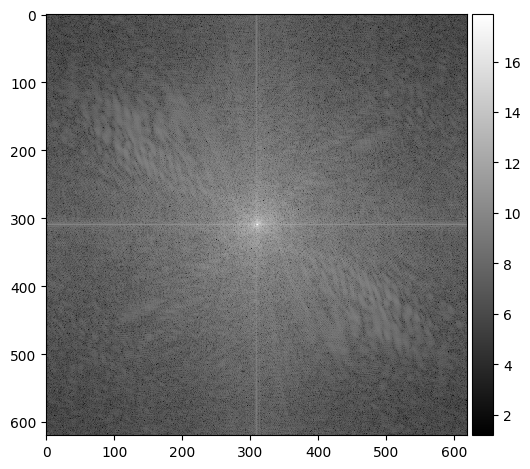

Image as a shape of  (620, 620)


In [21]:
# New libraries !
from skimage.io import imread, imshow
from matplotlib import pyplot as plt
import numpy as np


# lena = imread('X.npy')[:, :, 0]  # Only get one color channel
X =  np.load('X.npy')
imshow(np.log(np.abs(X)), cmap='gray')
plt.show()
# fig = plt.figure(figsize=(8,8))
# imshow(lena)
# plt.show()

# Shape
print("Image as a shape of ", X.shape)




<ipython-input-22-22b1fff7931d>:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(reconstructed, cmap='gray')
/usr/local/lib/python3.11/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


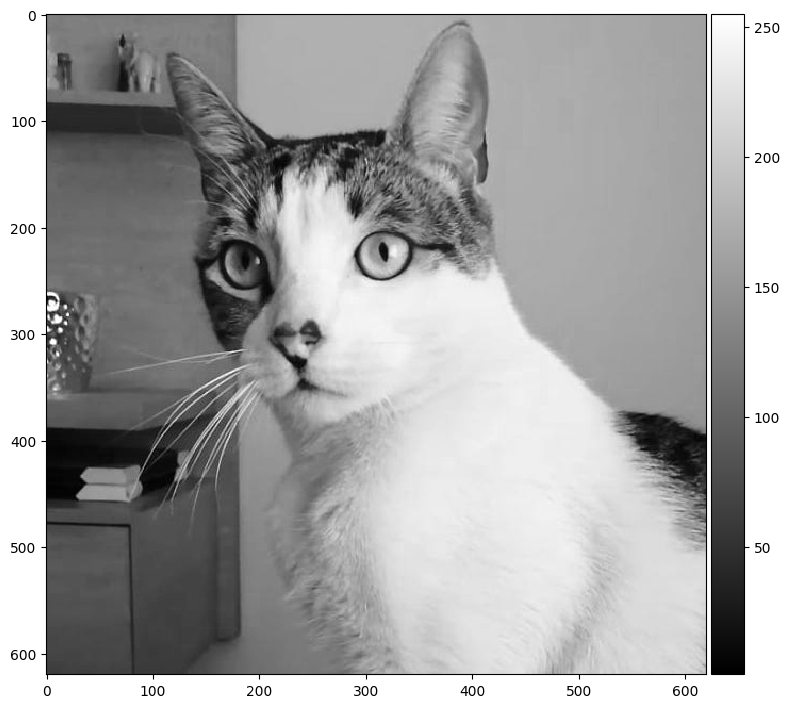

In [22]:
reconstructed = np.abs(np.fft.ifft2(np.fft.fftshift(X)))
fig = plt.figure(figsize=(8,8))
imshow(reconstructed, cmap='gray')
plt.show()

# Exercise 1.2
Apply a circular filter mask to the frequency domain image and reconstruct the image. Comment what you see


<ipython-input-25-1b19506ab118>:14: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(mask>0.5, cmap='gray')
<ipython-input-25-1b19506ab118>:19: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(reconstructed, cmap='gray')
/usr/local/lib/python3.11/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


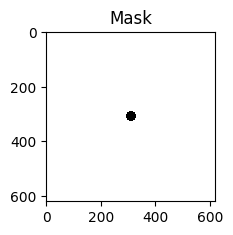

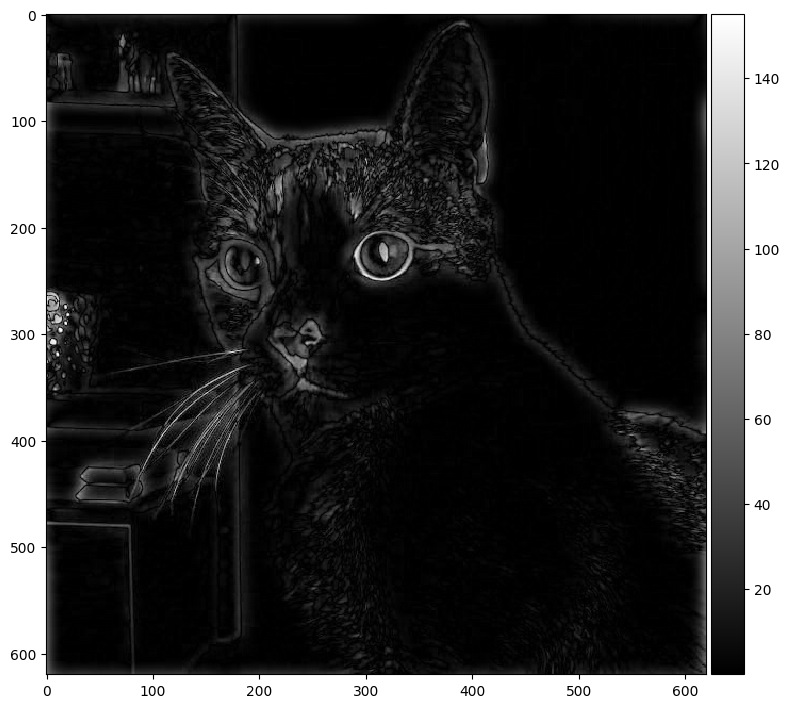

In [25]:
def gaus_mask(size, sigma_x, sigma_y, x, y):
    x = np.linspace(-10 - x, 10 - x, size[1])
    y = np.linspace(-10 + y, 10 + y, size[0])

    x, y = np.meshgrid(x, y)
    z = (1/(2*np.pi*sigma_x*sigma_y) * np.exp(-(x**2/(2*sigma_x**2)
         + y**2/(2*sigma_y**2))))
    return (z - np.min(z))/(np.max(z) - np.min(z))


mask = 1 - gaus_mask(lena.shape, sigma_x=0.5, sigma_y=0.5, x=0 ,y=0 )

ax=plt.subplot(1,3,2)
imshow(mask>0.5, cmap='gray')
ax.title.set_text("Mask")

reconstructed = np.abs(np.fft.ifft2(np.fft.fftshift(X*mask)))
fig = plt.figure(figsize=(8,8))
imshow(reconstructed, cmap='gray')
plt.show()

# Matlab
Repeate the same analysis on Matlab. With the command below download the data:

```R
url = "https://github.com/cgvalle/IIBM-BootCamp-2025/raw/main/assets/D5/X.mat"
websave('X.mat', url)
```


# **Don't forget to send your work!**
Please don't forget to send your work to give you feedback about your progress to this [form](https://forms.gle/sME7JXuoB4ztMCFq6). To send it, you need to download the Notebook from Colab's webpage and upload it in the last question of the form.